# Time Series Overview plots

### Introduction to Time Series in Presentation
plot multiple variables together, showing overall dynamics, and showcase the wealth of data available

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
CARIACO = pd.read_csv("../DATA/January/Combined_CARIACO_data_v5.csv")
CARIACO['date'] = pd.to_datetime(CARIACO['time_month'])
CARIACO = CARIACO.set_index('date')

In [3]:
CARIACO.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 316 entries, 1995-11-01 to 2021-11-01
Data columns (total 96 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    316 non-null    int64  
 1   cdww                          299 non-null    float64
 2   iews                          299 non-null    float64
 3   inss                          299 non-null    float64
 4   mcc                           299 non-null    float64
 5   mwp                           299 non-null    float64
 6   si10                          299 non-null    float64
 7   sp                            300 non-null    float64
 8   sst                           299 non-null    float64
 9   t2m                           299 non-null    float64
 10  tauoc                         299 non-null    float64
 11  u10                           299 non-null    float64
 12  ust                           300 non-null   

In [4]:
# yearly mean resample
CARIACO_yrly_mean = CARIACO.groupby(CARIACO.index.year).mean()
CARIACO_yrly_counts = CARIACO.groupby(CARIACO.index.year).count()

CARIACO_yrly_mean[CARIACO_yrly_counts<5] = np.nan

In [5]:
CARIACO_yrly_mean.index = pd.to_datetime(CARIACO_yrly_mean.index, format="%Y")

## first plot
- Temperature
- pH
- NO3
- PO4
- SiO4

## second plot
- Chlorophyll
- NPP
- Phaeopigment
- Zooplankton (tot biomass)

## third plot (ERA5)
- Wind (-u)
- sst
- precipitation
- evaporation
- irradiance

## fourth plot (Satellite)
- MODIS
- SeaWiFS
- MERGED

In [6]:
import pandas as pd
#import pandas_datareader.data as web

import numpy as np
#import matplotlib as mpl
import matplotlib.pyplot as plt
#%matplotlib inline
import matplotlib.dates as mdates

#import seaborn 
#sns.set_style('white', {"xtick.major.size": 2, "ytick.major.size": 2})
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71","#f4cae4"]
#sns.set_palette(sns.color_palette(flatui,7))

In [21]:
# Let's plot SPX and VIX cumulative returns with recession overlay
plot_cols = ['Temperature', 'pH_corrected', 'NO3_USF', 'PO4_USF', 'SiO4_USF']
y_label = ['°C', 'pH', 'µM', 'µM', 'µM']
no_of_rows = len(plot_cols)


def plottimeseries(plot_cols, y_label, no_of_rows, title=""):
    #colr_dict = {plot_cols[0]:flatui[0], plot_cols[1]:flatui[1],
    #            plot_cols[2]:flatui[2], plot_cols[3]:flatui[3],
    #            plot_cols[4]:flatui[4]}
    
    colr_dict = {col:flatui[i] for col, i in zip(plot_cols, range(no_of_rows))}

    #label_dict = {plot_cols[0]:y_label[0], plot_cols[1]:y_label[1],
    #            plot_cols[2]:y_label[2], plot_cols[3]:y_label[3],
    #            plot_cols[4]:y_label[4]}
    
    label_dict = {col:label for col, label in zip(plot_cols, y_label)}
    # 2 axes for 2 subplots

    fig, axes = plt.subplots(no_of_rows,1, figsize=(10,12), sharex=True)

    axes[0].set_title(title)

    axes[0].tick_params(labelbottom=False,labeltop=True)

    for col, ax in zip(plot_cols, axes):
        print(col)
        ax.scatter(x=CARIACO.index, y=CARIACO[col], 
                   c=colr_dict[col], label=col, marker='.', alpha=0.3)
        ax.scatter(x=CARIACO_yrly_mean.index, 
                   y=CARIACO_yrly_mean[col], marker=1, s=350, 
                   c=colr_dict[col])
        ax.set_ylabel(label_dict[col], size=14)
        ax.legend(loc='upper right', fontsize='large')

        ax.xaxis.set_minor_locator(mdates.YearLocator())

        #ax.grid(True,which='both', color='lightgrey')
        ax.tick_params(top=False, right=True, direction="in")

        idx = np.isfinite(CARIACO[col].values)
        fit = np.polyfit(mdates.date2num(CARIACO.index[idx]), CARIACO[col].values[idx].flatten(), 1)
        fit_fn = np.poly1d(fit)

        ax.plot(CARIACO.index, fit_fn(mdates.date2num(CARIACO.index)), 
                   c=colr_dict[col], 
                label='linear reg', zorder=10, alpha=0.3)

    plt.subplots_adjust(wspace=0, hspace=0)
    fig.align_ylabels()
    


#CARIACO[plot_cols].plot(kind='scatter', subplots=True, ax=axes)
#for ax in axes:
#    ax.axvspan(recs2k_bgn, recs2k_end, color=sns.xkcd_rgb['grey'], alpha=0.5)
#    ax.axvspan(recs2k8_bgn, recs2k8_end,  color=sns.xkcd_rgb['grey'], alpha=0.5)

# PLOT 1

Temperature
pH_corrected
NO3_USF
PO4_USF
SiO4_USF


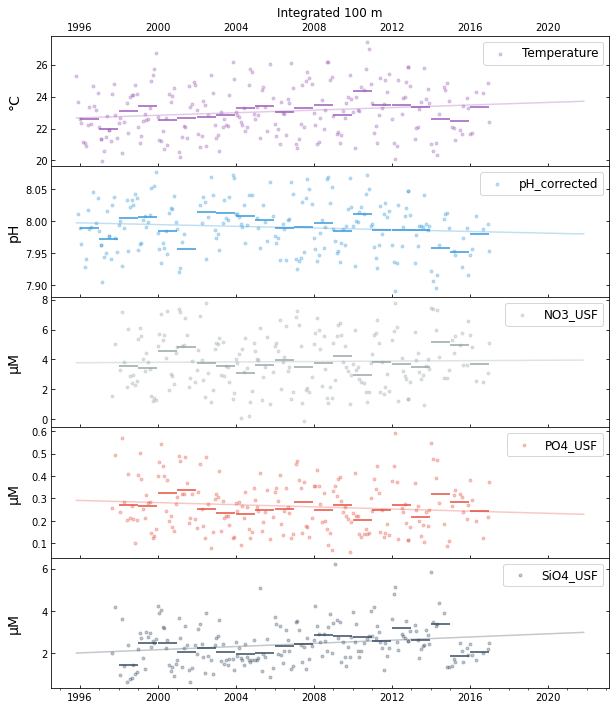

In [22]:
plot_cols = ['Temperature', 'pH_corrected', 'NO3_USF', 'PO4_USF', 'SiO4_USF']
y_label = ['°C', 'pH', 'µM', 'µM', 'µM']
no_of_rows = len(plot_cols)

plottimeseries(plot_cols, y_label, no_of_rows, title='Integrated 100 m')
plt.savefig("NewTimeSeriesPlots/TS1_TemppHNuts_100m.png")

Temperature_35m
pH_corrected_35m
NO3_USF_35m
PO4_USF_35m
SiO4_USF_35m


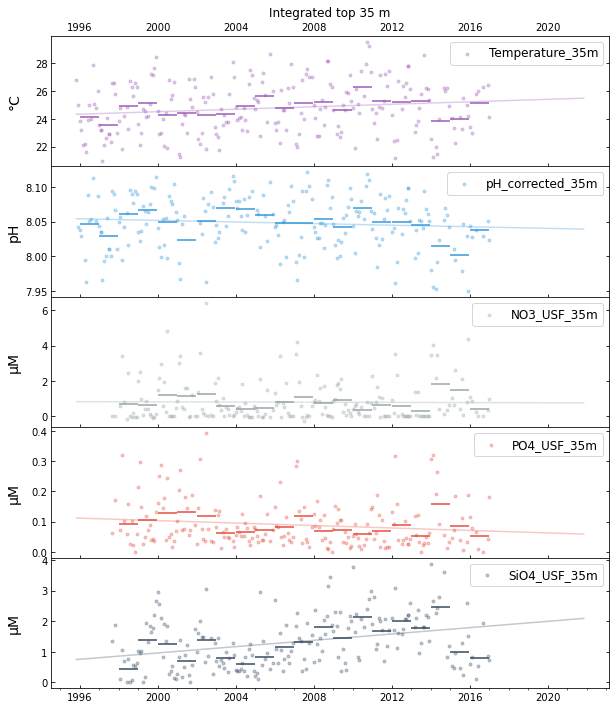

In [23]:
plot_cols = ['Temperature_35m', 'pH_corrected_35m', 'NO3_USF_35m', 'PO4_USF_35m', 'SiO4_USF_35m']
y_label = ['°C', 'pH', 'µM', 'µM', 'µM']
no_of_rows = len(plot_cols)

plottimeseries(plot_cols, y_label, no_of_rows, title='Integrated top 35 m')
plt.savefig("NewTimeSeriesPlots/TS1_TemppHNuts_35m.png")

Temperature_35to100m
pH_corrected_35to100m
NO3_USF_35to100m
PO4_USF_35to100m
SiO4_USF_35to100m


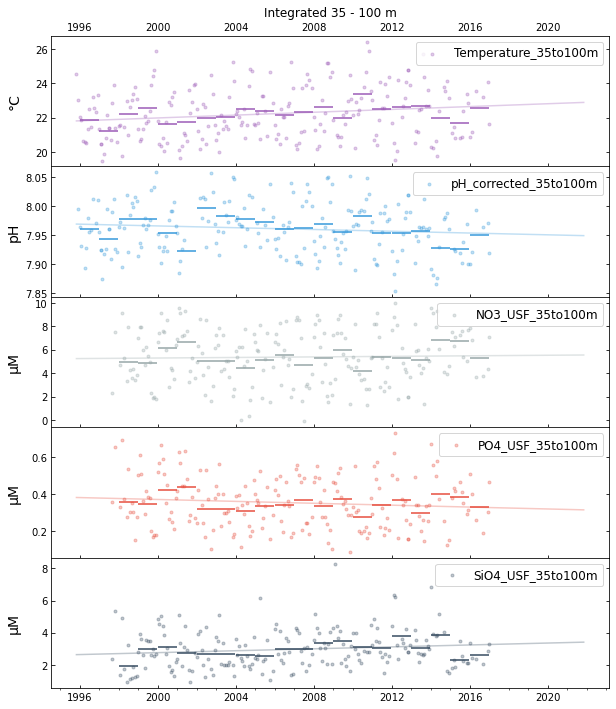

In [20]:
plot_cols = ['Temperature_35to100m', 'pH_corrected_35to100m', 'NO3_USF_35to100m', 'PO4_USF_35to100m', 'SiO4_USF_35to100m']
y_label = ['°C', 'pH', 'µM', 'µM', 'µM']
no_of_rows = len(plot_cols)

plottimeseries(plot_cols, y_label, no_of_rows, title='Integrated 35 - 100 m')
plt.savefig("NewTimeSeriesPlots/TS1_TemppHNuts_35to100m.png")

# PLOT 2

Chlorophyll
PrimaryProductivity
Phaeopigments
total_biomass


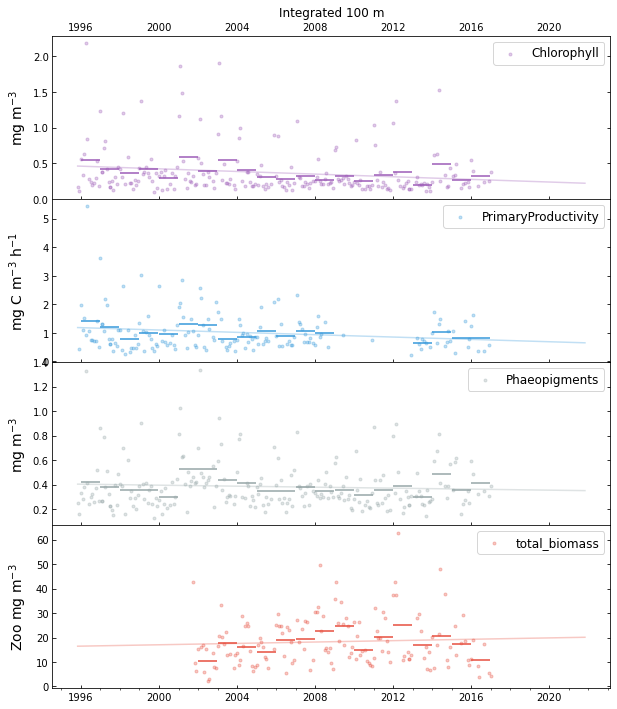

In [32]:
plot_cols = ['Chlorophyll', 'PrimaryProductivity', 'Phaeopigments', 'total_biomass']
y_label = ['mg $\mathrm{m}^{-3}$', 'mg C $\mathrm{m}^{-3}$ $\mathrm{h}^{-1}$', 'mg $\mathrm{m}^{-3}$', 'Zoo mg $\mathrm{m}^{-3}$']
no_of_rows = len(plot_cols)

plottimeseries(plot_cols, y_label, no_of_rows, title='Integrated 100 m')
plt.savefig("NewTimeSeriesPlots/TS1_ChlorophyllNPPPhaeoZoo_100m.png")

Chlorophyll_35m
PrimaryProductivity_35m
Phaeopigments_35m


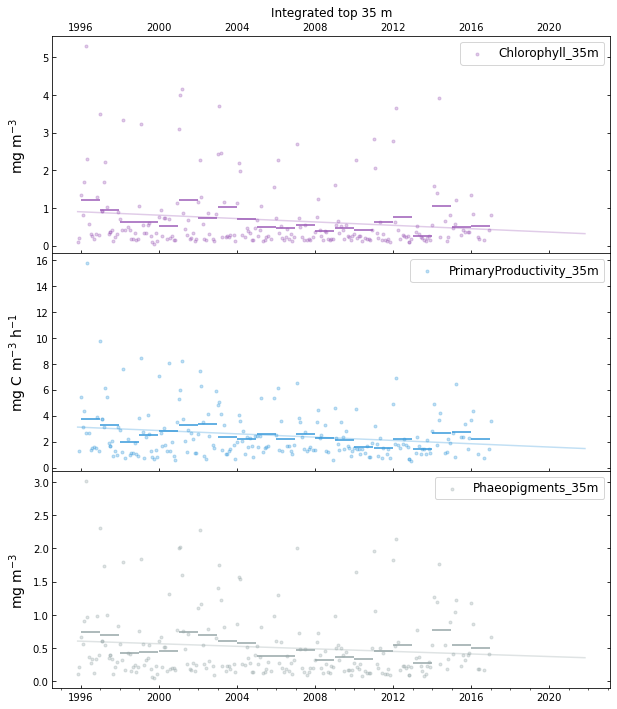

In [33]:
plot_cols = ['Chlorophyll_35m', 'PrimaryProductivity_35m', 'Phaeopigments_35m']
y_label = ['mg $\mathrm{m}^{-3}$', 'mg C $\mathrm{m}^{-3}$ $\mathrm{h}^{-1}$', 'mg $\mathrm{m}^{-3}$']
no_of_rows = len(plot_cols)

plottimeseries(plot_cols, y_label, no_of_rows, title='Integrated top 35 m')
#plt.savefig("NewTimeSeriesPlots/TS1_ChlorophyllNPPPhaeoZoo_35m.png")

Chlorophyll_35to100m
PrimaryProductivity_35to100m
Phaeopigments_35to100m


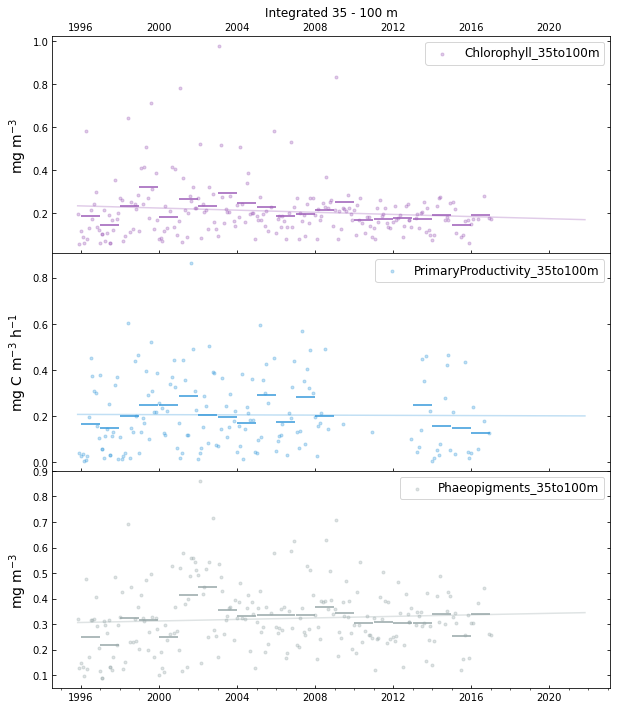

In [34]:
plot_cols = ['Chlorophyll_35to100m', 'PrimaryProductivity_35to100m', 'Phaeopigments_35to100m']
y_label = ['mg $\mathrm{m}^{-3}$', 'mg C $\mathrm{m}^{-3}$ $\mathrm{h}^{-1}$', 'mg $\mathrm{m}^{-3}$']
no_of_rows = len(plot_cols)

plottimeseries(plot_cols, y_label, no_of_rows, title='Integrated 35 - 100 m')
#plt.savefig("NewTimeSeriesPlots/TS1_ChlorophyllNPPPhaeoZoo_35m.png")